# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate as interp
from scipy import integrate

import ase
from ase.calculators import lj
from ase import build

from ase.md.verlet import VelocityVerlet
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase.io.trajectory import Trajectory

import atombond



In [2]:
import importlib
importlib.reload(atombond)

<module 'atombond' from 'C:\\Users\\AJoiner\\Documents\\Atomic-Bonding\\atombond.py'>

In [3]:
%matplotlib inline

In [4]:
# NOTE this code uses Equilibrium Lennard-Jones Units
# Units:
#  dist   = equil sep dist of atom pair = r_min^LJ
#  energy = |Energy at equil of atom pair| = |Energy well depth| = E_d
rmin_sig = 2**(1/6)

In [25]:
# for dist in idists_a:
# nn = coor_cutoff(dists_a,rcut=1.5)
g_a = (1/np.sqrt(2*np.pi))*np.exp((-1/2)*idists_a[:11]**2)
print(np.sum(g_a))


2.06834300835


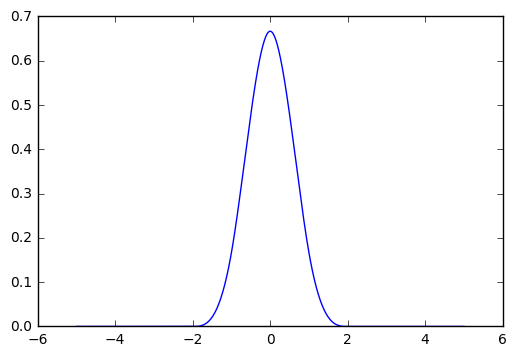

In [26]:
q_a = np.linspace(-5,5,1000)
w_a = local_kernel(q_a)
plt.plot(q_a,w_a, '-')

In [7]:
#pdf_min_a = []
#for ind in np.arange(dists_a.shape[0]):
 #   if sampdist_a[ind] > 1.0 and sampdist_a[ind] < 1.7:
        #min_a = np.min(pdf_approx_grid_a[ind])
        #pdf_min_a.append(min_a)
        
#pdf_min_a = np.array(pdf_min_a)

#print(pdf_min_a)

In [8]:
# Nx = 9 
# liq_at = get_lj_fcc_struc(nabc_super=[Nx,Nx,Nx],dNN=1.1)

In [9]:
Nx = 5
liq_at = atombond.get_lj_fcc_struc(super_a=[Nx,Nx,Nx],dNN=1.2,E_lj=1/40)
print(liq_at)

Atoms(symbols='X500', pbc=[True, True, True], cell=[8.48528137423857, 8.48528137423857, 8.48528137423857], positions=..., calculator=LennardJones(...))


In [10]:
Nat = liq_at.get_number_of_atoms()
Vat = liq_at.get_volume()
Lat = (Vat)**(1/3)
rhoat = Nat/Vat
print(Lat, Vat)
np.sort(liq_at.positions)

8.48528137424 610.940258945


array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.84852814,  0.84852814],
       [ 0.        ,  0.84852814,  0.84852814],
       ..., 
       [ 6.7882251 ,  7.63675324,  7.63675324],
       [ 6.7882251 ,  7.63675324,  7.63675324],
       [ 6.7882251 ,  7.63675324,  7.63675324]])

In [11]:
Lc = Lat/3
Lc**3

22.627416997969505

In [12]:
print(Nat)
print(Vat/Nat)
print(rhoat)


500
1.22188051789
0.818410626373


In [13]:
# np.sort(liq_at.get_all_distances(mic=True).ravel())[Nat:]
# liq_at.get_cell()

In [14]:
"""
T=600
# gbins=30
# grange=[.5,2.7]

traj_filenm = 'test.traj'
Nstep = 300
traj_freq = 10


atombond.run_mdsim(liq_at,T,Nstep,Tdampfac=30,dt=1e-2,rand_vel=True,traj_filenm=traj_filenm,traj_freq=traj_freq)
"""

"\nT=600\n# gbins=30\n# grange=[.5,2.7]\n\ntraj_filenm = 'test.traj'\nNstep = 300\ntraj_freq = 10\n\n\natombond.run_mdsim(liq_at,T,Nstep,Tdampfac=30,dt=1e-2,rand_vel=True,traj_filenm=traj_filenm,traj_freq=traj_freq)\n"

In [15]:
traj_filenm = 'lj_rho0.82_T600_N500.traj'
traj = Trajectory(traj_filenm)

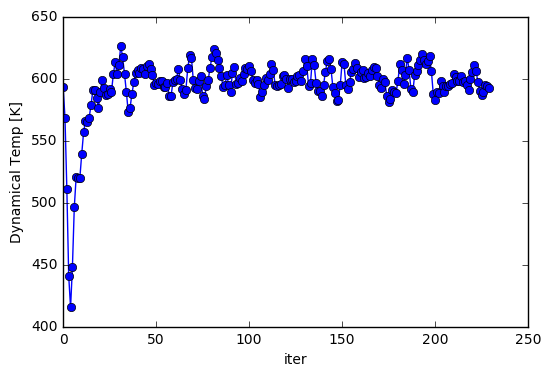

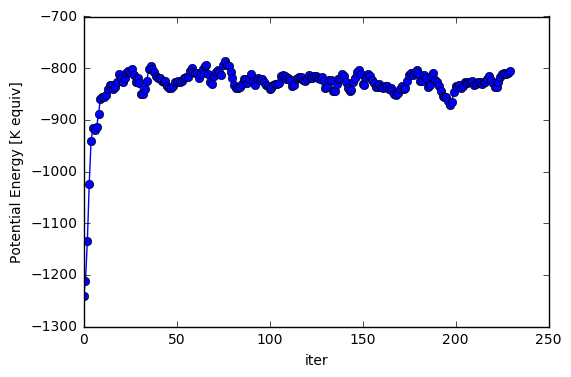

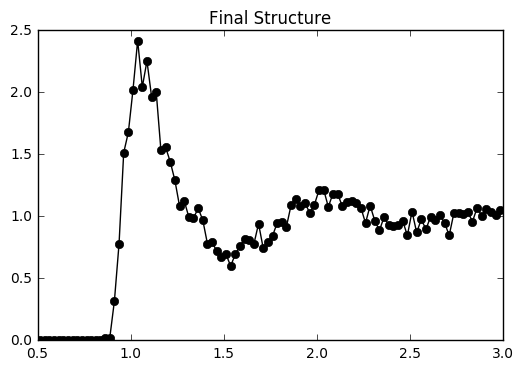

In [16]:
atombond.plot_energy_convergence(traj_filenm,istart=0)

In [17]:
atoms=traj[-1]
Vtot = atoms.get_volume()
print(Vtot)
dist_a=atoms.get_all_distances(mic=True)
dists_a = np.sort(dist_a)

610.940258945


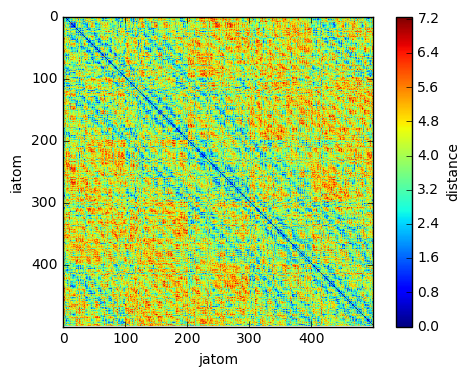

In [18]:
plt.imshow(dist_a)
cbar= plt.colorbar()
cbar.set_label('distance')
plt.xlabel('jatom')
plt.ylabel('iatom')

In [19]:
#dist_a[1]

In [20]:
def coor_cutoff(dists_a,rcut=1.5):
    assert dists_a.ndim==1, 'dists_a must be a 1 dimensional array'

    # inputs distances and returns coordination number
    w_a = dists_a <= rcut
    coornum = np.sum(w_a)
    return coornum



(498,)


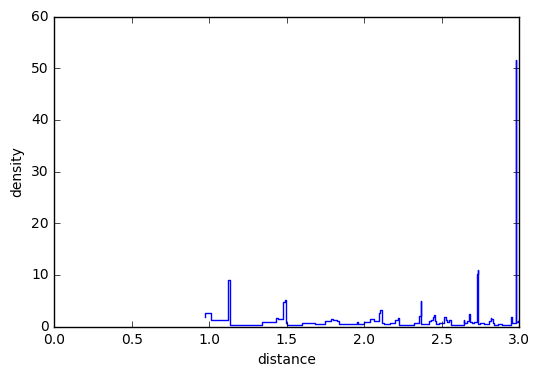

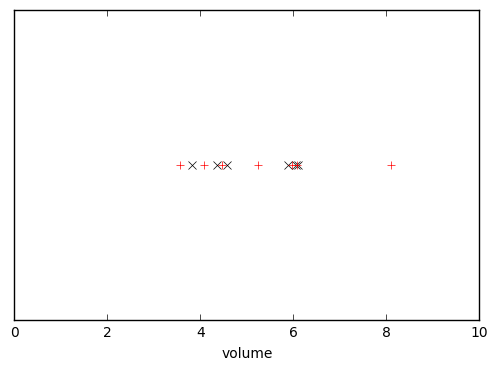

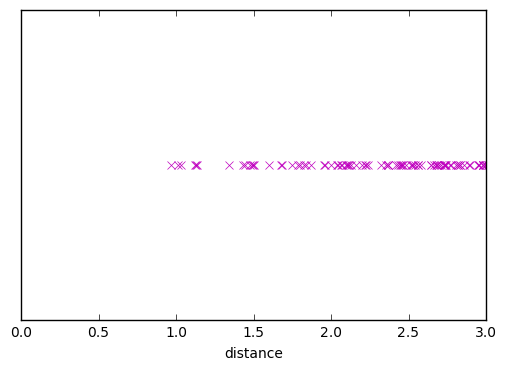

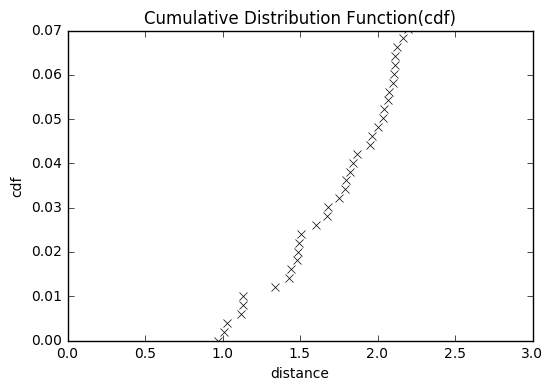

In [21]:
idist_a = dist_a[30]
idist_a.shape
idists_a= np.sort(idist_a)[1:]
frac_a = np.linspace(0,1,idists_a.size)
#print(idists_a)
iVol_a = 4/3*np.pi*idists_a**3

# calculates midpoint for volume
iVolmid_a=0.5*np.diff(iVol_a)+iVol_a[:-1]
iVolbound0 = iVol_a[0] - 0.5*(iVol_a[1]-iVol_a[0])
# iVolbound0 = iVol_a[0] - (iVolmid_a[0]-iVol_a[0])
iVolbound_a = np.hstack((iVolbound0,iVolmid_a))

idVol_a = np.diff(iVolbound_a)
print(idVol_a.shape)
# print(iVolbound_a)
rho_a = 1/idVol_a

plt.step(idists_a[0:99], rho_a[0:99], where='pre')
plt.xlim(0,3)
plt.xlabel('distance')
plt.ylabel('density')

plt.figure()
plt.plot(iVol_a, 0*iVol_a, 'kx')
plt.plot(iVolbound_a,0*iVolbound_a, 'r+')
ax = plt.gca()
ax.set_yticklabels([],visible=False)
ax.set_yticks([])
plt.xlim(0, 10)
plt.xlabel('volume')

plt.figure()
plt.plot(idists_a, 0*idists_a, 'mx')
plt.gca().set_yticklabels([], visible=False)
plt.gca().set_yticks([])
plt.xlabel('distance')
plt.xlim(0,3)

plt.figure()

plt.title('Cumulative Distribution Function(cdf)')
plt.plot(idists_a,frac_a,'kx')
plt.xlim(0,3)
plt.ylim(0,0.07)
plt.xlabel('distance')
plt.ylabel('cdf')



In [22]:
print(dists_a.shape)
coor_cutoff(idists_a,rcut=1.5)

(500, 500)


12

In [27]:
def coor_econ(dists_a,TOL=1e-5,dosort=True,nexp=6):
    # assert len(dists_a.shape)
    assert dists_a.ndim==1, 'dists_a must be a 1 dimensional array'

    
    if dosort:
        dists_a = np.sort(dists_a)
    
    if dists_a[0]==0:
        dists_a = dists_a[1:]
        
    dnnavg = dists_a[0]
    
    # loops until distances stop changing
    while True:
        w_a = np.exp(1 - (dists_a / dnnavg)**nexp)
        dnnavg_next = np.sum(w_a * dists_a) / np.sum(w_a)
        if np.abs(dnnavg_next/dnnavg-1) < TOL:
            break
        dnnavg = dnnavg_next
    
    coornum = np.sum(w_a)
    return coornum
# coor_econ(dists_a) 

In [28]:
def coor_sann(idists_a):
    assert idists_a.ndim==1, 'dists_a must be a 1 dimensional array'

    N = idists_a.shape[0]
    rad1=idists_a[0]
    Nbond = 3
    # Nbond bc we want the 3rd index to be the 4th atom(the 1st atom that's not bonded)
    rnonbond = idists_a[Nbond]
    # sum over Nbond neighbors 
    rshell = np.sum(idists_a[:Nbond]/(Nbond-2))
    while rshell > rnonbond:
        Nbond += 1
        rshell = np.sum(idists_a[:Nbond]/(Nbond-2))
        rnonbond = idists_a[Nbond]
        
        
    w_a = (1-idists_a[:Nbond]/rshell)/(1-rad1/rshell)      
    coornum = np.sum(w_a)
    return coornum

# coor_sann(idists_a)

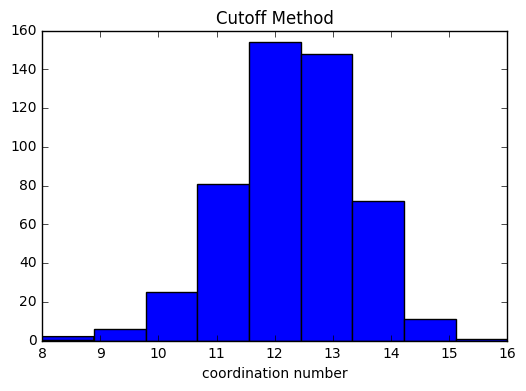

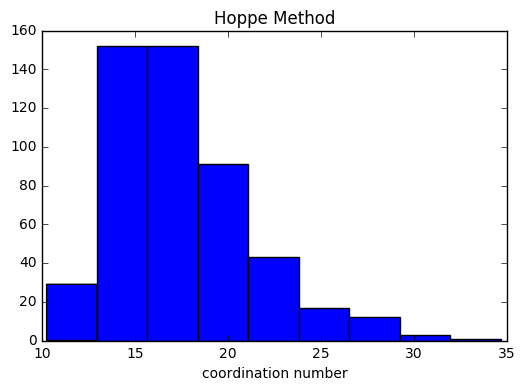

In [29]:
N = dist_a.shape[0]
cn_cutoff_a = np.zeros(N)
cn_econ_a = np.zeros(N)
for ind in np.arange(N):
    idist_a = dist_a[ind]
    icutoff = coor_cutoff(idist_a,rcut=1.5)
    iecon = coor_econ(idist_a,nexp=3)
    
    cn_cutoff_a[ind] = icutoff
    cn_econ_a[ind] = iecon
    

plt.hist(cn_cutoff_a,9)
plt.xlabel('coordination number')
plt.title('Cutoff Method')
plt.figure()

plt.hist(cn_econ_a,9)
plt.xlabel('coordination number')
plt.title('Hoppe Method')

(500, 499)
12
7.11802014739
6.49978300575


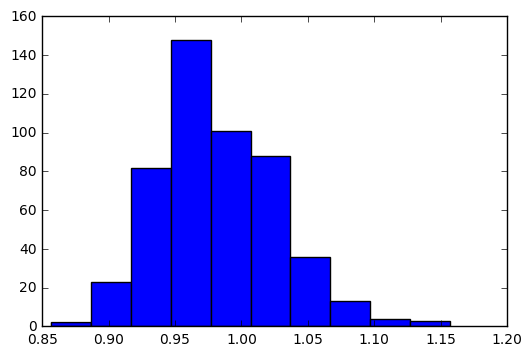

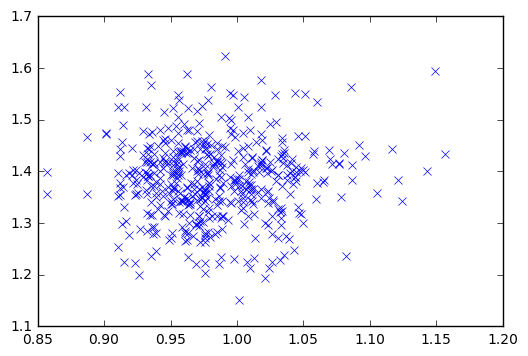

In [30]:
distalls_a=np.sort(dist_a,axis=1)[:,1:]
distalls_a[-1]
# plt.imshow(distalls_a)
plt.hist(distalls_a[:,0],10)
plt.figure()

nn_num=9

plt.plot((distalls_a[:,0]),(distalls_a[:,nn_num]), 'x')
print(distalls_a.shape)
iatom = 20
print(coor_cutoff(distalls_a[iatom]))
print(coor_econ(distalls_a[iatom]))
print(coor_sann(distalls_a[iatom]))

In [31]:
coor_num_global=atombond.calc_coor_num(rhoat,r_a,g_avg_a,rcut=1.515,debug=False,Ngrid=1001)

11.344
6.56419831161
6.16694047081


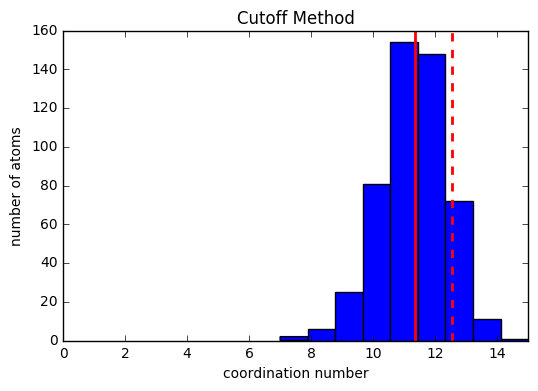

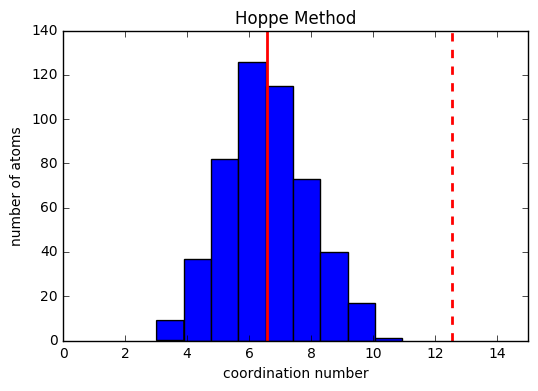

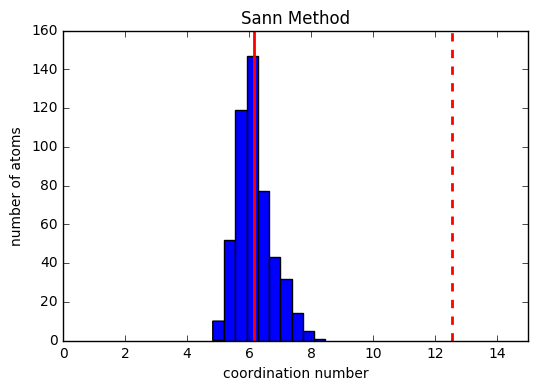

In [32]:
N = dist_a.shape[0]
cn_cutoff_a = np.zeros(N)
cn_econ_a = np.zeros(N)
cn_sann_a = np.zeros(N)
for ind in np.arange(N):
    idists_a = distalls_a[ind]
    icutoff = coor_cutoff(idists_a,rcut=1.5)
    iecon = coor_econ(idists_a)
    isann = coor_sann(idists_a)
    
    cn_cutoff_a[ind] = icutoff
    cn_econ_a[ind] = iecon
    cn_sann_a[ind]= isann


plt.hist(cn_cutoff_a,9)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Cutoff Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_cutoff_a),linewidth=2,color='r')
plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')
plt.figure()

plt.hist(cn_econ_a,9)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Hoppe Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_econ_a),linewidth=2,color='r')
plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')

plt.figure()
plt.hist(cn_sann_a,10)
plt.xlabel('coordination number')
plt.ylabel('number of atoms')
plt.title('Sann Method')
plt.xlim(0,15)
plt.axvline(x=np.mean(cn_sann_a),linewidth=2,color='r')
plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')

print(np.mean(cn_cutoff_a))
print(np.mean(cn_econ_a))
print(np.mean(cn_sann_a))
#print(atombond.calc_avg_pdf)

In [33]:
#################
def calc_rcut_global(pdf_a,sampdist_a):
    
    ind_max = np.argmax(pdf_a)
    ind_min= np.argmin(pdf_a[ind_max:]) + ind_max 
    rcut = sampdist_a[ind_min]
    
    return rcut

def calc_rcut_local(pdf_a,sampdist_a):
    
    ind_max = np.argmax(pdf_a)
    pdf_diff_a = np.diff(pdf_a[ind_max:])
    ind_min= np.where(pdf_diff_a> 0)[0][0] + ind_max
    
    
    #ind_min= np.argmin(pdf_a[ind_max:]) + ind_max 
    rcut = sampdist_a[ind_min]
    
    return rcut

In [34]:

pdf_approx_grid_a = []
#print(dists_a.shape)

for ind in np.arange(dists_a.shape[0]):
    ipdf_a, sampdist_a = approx_pdf_kde(dists_a[ind],rhoat)
    pdf_approx_grid_a.append(ipdf_a)
    
pdf_approx_grid_a = np.array(pdf_approx_grid_a)
    
#print(ipdf_a,sampdist_a)
#print(pdf_approx_grid_a.shape)
print(pdf_approx_grid_a)

[[ 0.          0.          0.         ...,  1.00503716  1.00410012
   1.00303243]
 [ 0.          0.          0.         ...,  0.92092712  0.91854232
   0.9161446 ]
 [ 0.          0.          0.         ...,  1.0259304   1.02285457
   1.01964145]
 ..., 
 [ 0.          0.          0.         ...,  0.99171178  0.99283783
   0.9939314 ]
 [ 0.          0.          0.         ...,  0.88854189  0.88714345
   0.88580912]
 [ 0.          0.          0.         ...,  0.95576372  0.95589404
   0.95602793]]


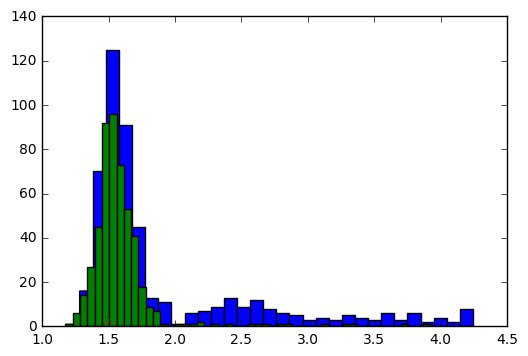

In [35]:
#rcut_global_a =[]
#rcut_local_a =[]
#for ind in np.arange(pdf_approx_grid_a.shape[0]):
#    pdf_a = pdf_approx_grid_a[ind]
#    rcut_global_a.append(calc_rcut_global(pdf_a,sampdist_a))
#    rcut_local_a.append(calc_rcut_local(pdf_a,sampdist_a))
    
#rcut_global_a = np.array(rcut_global_a)
#rcut_local_a = np.array(rcut_local_a)

#for pdf_a in pdf_approx_grid_a:
    
Natom = 500 #pdf_approx_grid_a.shape[0]
rcut_global_a = np.zeros(Natom)
rcut_local_a = np.zeros(Natom)
    
for ind, pdf_a in enumerate(pdf_approx_grid_a):
    rcut_global_a[ind] = calc_rcut_global(pdf_a,sampdist_a)
    rcut_local_a[ind] = calc_rcut_local(pdf_a,sampdist_a)
    

plt.hist(rcut_global_a, 30)
plt.hist(rcut_local_a, 50)
plt.plot(1.5,np.mean(rcut_global_a),'r+')
#plt.axvline(x=np.mean(rcut_global_a),ymin=0,ymax=140,linewidth=2,color='k')

(499,)
(491,)
(499,)


C:\Users\AJoiner\Anaconda3\lib\site-packages\numpy\core\numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


0.0

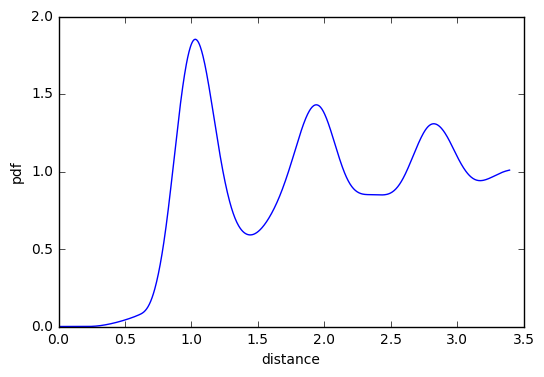

In [36]:
def local_kernel(x_a):
    q_a = np.abs(x_a)
    kernel_a = np.zeros(q_a.shape)
    ind_outer = np.where(np.abs(q_a)<=2)
    kernel_a[ind_outer] = 1/6*(2-q_a[ind_outer])**3
    
    ind_inner = np.where(np.abs(q_a)<=1)
    kernel_a[ind_inner] = 1/6*( (2-q_a[ind_inner])**3 - 4*(1-q_a[ind_inner])**3 )

    return kernel_a

    
def approx_pdf_kde(dists_a,rhobar,bandwidth=0.25):
    if dists_a[0] == 0:
        dists_a = dists_a[1:]
    #FIX
    Nsamp = 1001
    pdf_approx_a = np.zeros(Nsamp)
    sampdist_a = np.linspace(0.001, Lat/2, Nsamp)
    for ind in np.arange(dists_a.size):
        #calculates the observed number of atoms per angstrom
        #if integrated, coordination number is given
        # dn_dr_a = (1/np.sqrt(2*np.pi)/bandwidth)*np.exp((-1/2)*(dists_a[ind]-sampdist_a)**2/(bandwidth**2))
        dn_dr_a = local_kernel( (dists_a[ind]-sampdist_a)/bandwidth )/ bandwidth
        assert dn_dr_a[0] == 0, 'bandwidth is too large for the closest neighboring atom'
        g_a = dn_dr_a/(4*np.pi*sampdist_a**2*rhobar)
        #print(g_a)
        
        # print(dn_dr_a[:20])
        pdf_approx_a += g_a
    
    return pdf_approx_a, sampdist_a


def approx_pdf_kde_adapt(dists_a,rhobar,num_neighbor=4,bandwidth_fac=1):
    if dists_a[0] == 0:
        dists_a = dists_a[1:]
    #FIX
    #bandwidth_a = np.array(idists_a.size)
    dist_diff_a = np.diff(dists_a)
    w_a=np.ones(num_neighbor-1)/(num_neighbor-1)
    avg_bandwidth_a=np.convolve(dist_diff_a,w_a, mode='valid')
    front_bandwidth_a=avg_bandwidth_a[0]*np.ones(num_neighbor/2)
    back_bandwidth_a =avg_bandwidth_a[-1]*np.ones(num_neighbor/2)
    bandwidth_a=bandwidth_fac*np.hstack((front_bandwidth_a,avg_bandwidth_a,back_bandwidth_a))*(dists_a/dists_a[0])**2
    print(bandwidth_a.shape)
    print(avg_bandwidth_a.shape)
    print(dists_a.shape)
    #print(bandwidth_a)
    
    dist_cutoff = Lat/2
    Nsamp = 1001
    pdf_approx_a = np.zeros(Nsamp)
    dn_dr_tot_a = np.zeros(Nsamp)
    sampdist_a = np.linspace(0.001, .8*dist_cutoff, Nsamp)
    
    #for ind in np.arange(np.round(idists_a.size*.8)):
    for ind in np.arange(idists_a.size):
        #calculates the observed number of atoms per angstrom
        #if integrated, coordination number is given
        ##dn_dr_a = (1/np.sqrt(2*np.pi)/bandwidth)*np.exp((-1/2)*(dists_a[ind]-sampdist_a)**2/(bandwidth**2))
        if dists_a[ind] > dist_cutoff:
            break
        ibandwidth= bandwidth_a[ind]
        dn_dr_a = local_kernel( (dists_a[ind]-sampdist_a)/ibandwidth )/ ibandwidth
        g_a = dn_dr_a/(4*np.pi*sampdist_a**2*rhobar)
        #print(g_a)
        
        # print(dn_dr_a[:20])
        pdf_approx_a += g_a
        dn_dr_tot_a +=dn_dr_a
    
    return pdf_approx_a, sampdist_a,dn_dr_tot_a

pdf_local_a,sampdist_a,dn_dr_tot_a=approx_pdf_kde_adapt(dists_a[0],rhoat, num_neighbor=9,bandwidth_fac=4.3)
plt.plot(sampdist_a, pdf_local_a,'-')
plt.xlabel('distance')
plt.ylabel('pdf')
#plt.ylim(0,10)
plt.figure()
dr = sampdist_a[1]-sampdist_a[0]
#plt.plot(sampdist_a, np.gradient(np.cumsum(dn_dr_tot_a),dr)/sampdist_a**2, '-')
#plt.plot(sampdist_a, dn_dr_tot_a, '-')
dn_dr_tot_a[0]
#print(pdf_local_a)

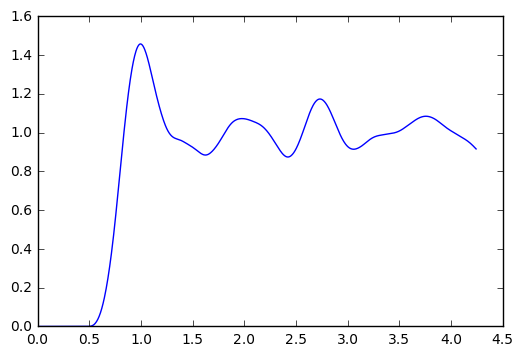

In [37]:
pdf_approx_a,sampdist_a=approx_pdf_kde(dists_a[1],rhoat,bandwidth=0.25)
plt.plot(sampdist_a,pdf_approx_a,'-')

In [38]:
print(Lat/2)

4.24264068712


1.45588275568
1.45588275568
[ 0.          0.          0.         ...,  0.98378755  0.9830986
  0.98229801]


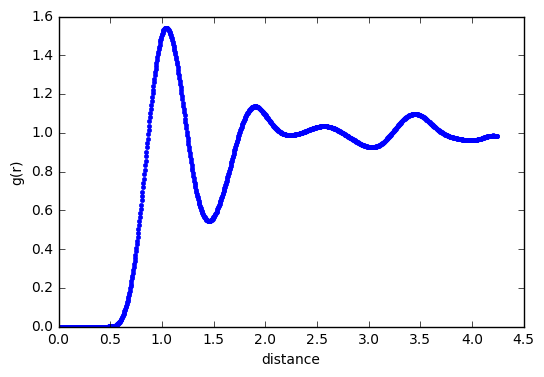

In [39]:
iatom=200
idist_a = dist_a[iatom]
idists_a= np.sort(idist_a)[1:]

pdf_approx_a,sampdist_a=approx_pdf_kde(idists_a, rhoat, bandwidth=0.25)
#rcut=calc_rcut_local(pdf_a,sampdist_a)
Nsamp=1001
idist_a = dist_a[30]
idist_a.shape
idists_a= np.sort(idist_a)[1:]

rcut=calc_rcut_local(pdf_approx_a,sampdist_a)
print(rcut)


plt.plot(sampdist_a,pdf_approx_a,'.')
plt.xlabel('distance')
plt.ylabel('g(r)')
#print(kde_a[0])

#print(kde_a[0][0:50])

print(calc_rcut_local(pdf_approx_a,sampdist_a))
print(pdf_approx_a)

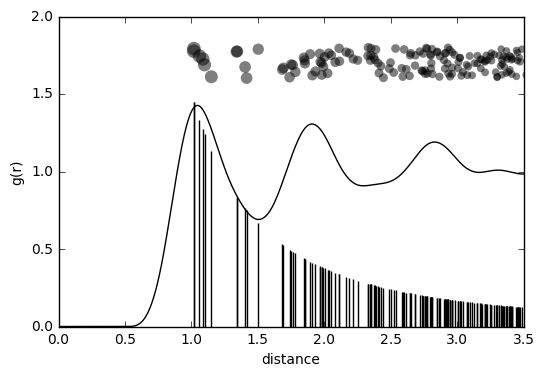

In [40]:
iatom=0
idist_a = dist_a[iatom]
idists_a= np.sort(idist_a)[1:]

pdf_approx_a,sampdist_a=approx_pdf_kde(idists_a, rhoat, bandwidth=0.25)
#rcut=calc_rcut_local(pdf_a,sampdist_a)
Nsamp=1001
#idist_a = dist_a[30]
#idist_a.shape
#idists_a= np.sort(idist_a)[1:]

#rcut=calc_rcut_local(pdf_approx_a,sampdist_a)
#print(rcut)
cm=plt.cm.get_cmap('Greys')
plt.plot(sampdist_a,pdf_approx_a,'k-')
plt.scatter(idists_a,np.random.rand(499)*0.2+1.6,s=100/idists_a,alpha=.5,lw=0,c='k')
plt.errorbar(idists_a,0*idists_a,yerr=1.5/idists_a**2,fmt='k.',capsize=0,ms=0)
plt.ylim(0,2)
plt.xlim(0,3.5)
plt.xlabel('distance')
plt.ylabel('g(r)')
#print(kde_a[0])

#print(kde_a[0][0:50])

#print(calc_rcut_local(pdf_approx_a,sampdist_a))
#print(pdf_approx_a)

(array([ 0.        ,  0.        ,  0.        , ...,  1.00503716,
        1.00410012,  1.00303243]), array([  1.00000000e-03,   5.24164069e-03,   9.48328137e-03, ...,
         4.23415741e+00,   4.23839905e+00,   4.24264069e+00]))


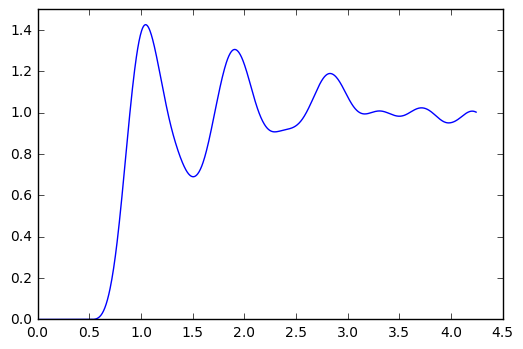

In [41]:
pdf_approx_a,sampdist_a=approx_pdf_kde(idists_a, rhoat, bandwidth=0.25)

plt.plot(sampdist_a,pdf_approx_a,'-')
plt.ylim(0,1.5)

print(approx_pdf_kde(idists_a,rhoat,bandwidth=0.25))

In [42]:
np.interp(rcut,sampdist_a,pdf_approx_a)
rcut_a= np.zeros(Nsamp)
for pdf in pdf_approx_grid_a:
    rcut_a=calc_rcut_local(pdf,sampdist_a)
    
np.interp(rcut_a,sampdist_a,pdf_approx_a)

0.6912564662981254

In [45]:
%load_ext snakeviz

In [41]:
importlib.reload(atombond)
%snakeviz CN_local=atombond.calc_coor_num(rhoat,sampdist_a,pdf_approx_a,debug=False,Ngrid=1001)

 
*** Profile stats marshalled to file 'C:\\Users\\AJoiner\\AppData\\Local\\Temp\\tmpo1p2njpc'. 


In [43]:
def jatom_local_a(dist_a,pdf_a,sampdist_a,rhoat=rhoat,bandwidth=0.25):
    """
    Returns pdf at rcut global value, local CN of central atom, 
    local rcut value for central atom.
    
    Parameters
    ----------
    dist_a : array
        distances from each atom to all other atoms
    pdf_a : array
        distribution of distances within the simulation as a whole
    sampdist_a : array
        distances from one central atom to all other atoms
    rhoat : double
        density of each atom per unit volume
    bandwidth : double
        width of gaussian functions for each atom. 
        
    Returns
    -------
    pdf_global_a : double array
        pdf evaluated at rcut global value for central atom.
    CN_local_a : array
        Local coordination number of central atom using pdf integration.
    rcut_local_a : array
        rcut value at the first min of the pdf for central atom 
    """
    N=dist_a.shape[0]
    rcut_glob=calc_rcut_global(pdf_a,sampdist_a)
    pdf_global_a=np.zeros(N)
    rcut_local_a=np.zeros(N)
    CN_local_a=np.zeros(N)
    #bandwidth_a=np.linspace(0.001, 0.5)
    #for jatom in range(N):
    #jdist_a = dist_a[jatom]
    #for bandwidth in bandwidth_a:
    for jatom, jdist_a in enumerate(dist_a):
    #print(jatom)
        jdists_a = np.sort(jdist_a)
        pdf_approx_a,sampdist_a=approx_pdf_kde(jdists_a, rhoat, bandwidth=bandwidth)
    
        jpdf_global=np.interp(rcut_glob,sampdist_a,pdf_approx_a)
        pdf_global_a[jatom]=jpdf_global
    
        #CN_local=atombond.calc_coor_num(rhoat,sampdist_a,pdf_approx_a,debug=False,Ngrid=1001)
        #CN_local_a[jatom]=CN_local
        
        CN_local=atombond.calc_coor_num(rhoat,sampdist_a,pdf_approx_a,rcut=1.5,debug=False,Ngrid=1001)
        CN_local_a[jatom]=CN_local
        #CN_local=lambda x: 4*np.pi*(sampdist_a**2)*rhoat*pdf_approx_a
        #CN_local_a[jatom]=integrate.quad(CN_local,0,rcut_glob)
    
        rcut_local=calc_rcut_local(pdf_approx_a,sampdist_a)
        rcut_local_a[jatom]=rcut_local
    return pdf_global_a, rcut_local_a, CN_local_a

In [44]:
print((500/rhoat)**(1/3))

8.48528137424


(1001,)
(1001,)


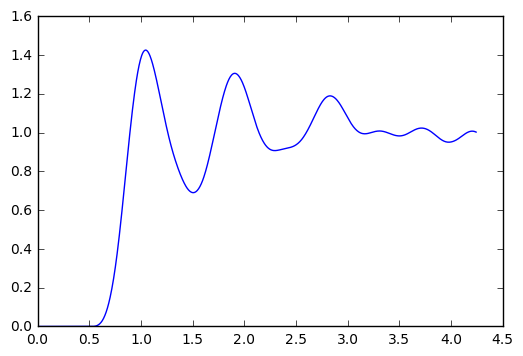

In [45]:
print(pdf_approx_a.shape)
print(sampdist_a.shape)
plt.plot(sampdist_a,pdf_approx_a)

In [49]:

bandwidth_a=np.linspace(0.001, 0.45,10)
for bandwidth in bandwidth_a:
    #print(bandwidth)
    #pdf_approx_a,sampdist_a=approx_pdf_kde(jdists_a, rhoat, bandwidth=bandwidth)
    
    #jpdf_global=np.interp(rcut_glob,sampdist_a,pdf_approx_a)
    #pdf_global_a[jatom]=jpdf_global

    pdf_global_a,rcut_local_a,CN_local_a=jatom_local_a(dist_a,pdf_a,sampdist_a,bandwidth=bandwidth)

#return pdf_global_a,rcut_local_a,CN_local_a

plt.plot(bandwidth_a,pdf_global_a[0:10],'-')
#print(bandwidth_a)
plt.figure()
plt.plot(bandwidth_a,rcut_local_a[0:10],'-')
plt.ylim(1.51,1.52)
plt.figure()
plt.plot(bandwidth_a,CN_local_a[0:10],'-')
print(bandwidth_a.shape)
print(pdf_global_a.shape)

KeyboardInterrupt: 

In [46]:
pdf_global_a,rcut_local_a,CN_local_a=jatom_local_a(dist_a,pdf_a,sampdist_a,bandwidth=0.25)

36.089850464514896

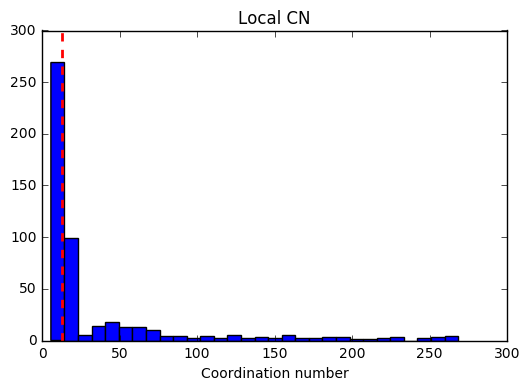

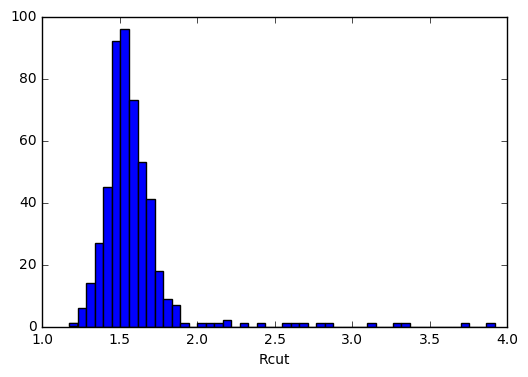

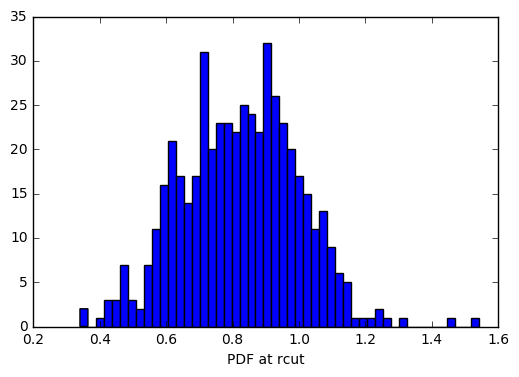

In [47]:
plt.hist(CN_local_a,30)
plt.title('Local CN')
plt.xlabel('Coordination number')
plt.axvline(coor_num_global,linewidth=2,color='r',ls='dashed')
#plt.xlim(0,30)
CN_local_a.mean(axis=0)
plt.figure()
plt.hist(rcut_local_a,50)
plt.xlabel('Rcut')
plt.figure()
plt.hist(pdf_global_a,50)
plt.xlabel('PDF at rcut')
np.mean(CN_local_a)

In [48]:
iatom=dist_a[1]
local_atom=dist_a[1:20]
local_atom_sort=np.sort(dist_a[1:20])
#approx_pdf_kde(np.ravel(local_atom),rhoat,bandwidth=0.25)
print(calc_rcut_local(pdf_approx_a,sampdist_a))
print(calc_rcut_local(pdf_approx_a,dist_a[56]))

1.50678244393
4.81639889127


In [104]:

Nlocal=20
iatom=2
#local_atom=dists_a[iatom:Nlocal+iatom]
local_atom_sort=np.sort(dists_a[iatom:Nlocal+iatom])
pdf_approx_a,sampdist_a=approx_pdf_kde(np.ravel(local_atom),rhoat,bandwidth=0.25/20)
print(calc_rcut_local(pdf_approx_a,sampdist_a))

AssertionError: bandwidth is too large for the closest neighboring atom

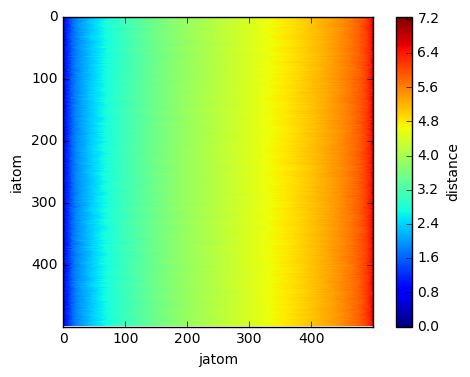

In [50]:
dists_a = np.sort(dist_a, axis=1)
dists_a.shape
plt.imshow(dists_a)
cbar= plt.colorbar()
cbar.set_label('distance')
plt.xlabel('jatom')
plt.ylabel('iatom')

In [51]:
def calc_Nlocal_dist(dist_a, iatom=2, Nlocal=20):
    assert np.all(np.diag(dist_a) == 0), 'dist_a must have diagonal elements all equal 0'
    indsort = np.argsort(dist_a)
    i_indsort = indsort[iatom]
    ind_Nlocal = i_indsort[0:Nlocal+1]
    Nlocal_dist = dist_a[ind_Nlocal,:]
    
    Nlocal_dist_unravel = np.sort(np.ravel(Nlocal_dist))[Nlocal+1:]
    
    return Nlocal_dist_unravel

In [52]:
def calc_regional_rcut_group(dist_a, iatom=2, Nlocal=20, bandwidth=0.25, rhoat=rhoat):
    Nlocal_dist_unravel = calc_Nlocal_dist(dist_a, iatom=iatom, Nlocal=Nlocal)
    # print(Nlocal_dist_unravel.shape)
    
    pdf_approx_a, sampdist_a = approx_pdf_kde(Nlocal_dist_unravel, rhoat, bandwidth=bandwidth)
    regional_rcut = calc_rcut_local(pdf_approx_a,sampdist_a)
    
    return regional_rcut
    
def calc_regional_rcut_avg(dist_a,iatom=2, Nlocal=20, bandwidth=0.25):
    assert np.all(np.diag(dist_a) == 0), 'dist_a must have diagonal elements all equal 0'
    indsort = np.argsort(dist_a)
    i_indsort=indsort[iatom]
    ind_Nlocal=i_indsort[0:Nlocal+1]
    Nlocal_dist=dist_a[ind_Nlocal,:]
    
    Nlocal_dist_unravel=np.sort(np.ravel(Nlocal_dist))[Nlocal+1:]
    
    
    regional_rcut_a=np.zeros(Nsim+21)
    for ind in ind_Nlocal:
        #print(ind)
        pdf_approx_a, sampdist_a = approx_pdf_kde(dists_a[ind], rhoat, bandwidth=bandwidth)
        regional_rcut_a[ind]=calc_rcut_local(pdf_approx_a,sampdist_a)
       
            
    regional_rcut=np.sum(regional_rcut_a) / (Nlocal+1)
    
    #print(np.sort(regional_rcut_a))
    #print(dists_a)
    
    return regional_rcut


In [105]:
#print(dists_a[2])
#print(Nlocal_dist_unravel[2])

In [57]:
iatom=2
indsort = np.argsort(dist_a)
np.max(indsort)
#plt.imshow(dist_a[indsort])

#print(dist_a[iatom,isort_a])
i_indsort=indsort[iatom]
#print( dist_a[iatom,i_indsort])
ind_Nlocal=i_indsort[0:Nlocal+1]
Nlocal_dist=dist_a[ind_Nlocal,:]
Nlocal_dist_unravel=np.sort(np.ravel(Nlocal_dist))[Nlocal+1:]
print(Nlocal_dist.shape)
print(Nlocal_dist_unravel)
print(ind_Nlocal)

(21, 500)
[ 0.91192439  0.91192439  0.92101545 ...,  7.03356495  7.06360744
  7.19143498]
[  2 191 289 392 290 365 105 291 115 265 271 114 110 309 112 208 286 311
 182 395 251]


In [108]:
iatom, Nlocal, bandwidth = 2, 20, 0.25
print('rcut_group = ', calc_regional_rcut_group(dist_a, iatom=iatom, Nlocal=Nlocal, bandwidth=bandwidth))
print('rcut_avg = ', calc_regional_rcut_avg(dist_a, iatom=iatom, Nlocal=Nlocal, bandwidth=bandwidth))

rcut_group =  1.51102408461
rcut_avg =  1.52213314356


[ 1.50678244  1.62130674  1.65099823  1.48981588  1.34135846  1.42194963
  1.63827331  1.76128089  1.35408338  1.64675659  1.57040705  1.60434018
  1.54071557  1.40498307  1.68917299  1.4601244   1.52799065  1.50678244
  1.62979002  1.31166697  1.60009854  1.7527976   1.52799065  1.55344049
  1.53223229  1.28621713  1.74855596  1.70189792  1.5025408   1.42194963
  1.29045877  1.46860768  2.27451941  1.62979002  1.25652564  1.59161526
  1.34135846  1.45164111  1.8673219   1.46860768  3.36462106  1.60858182
  1.51526573  1.42194963  1.4601244   1.52799065  2.07092066  1.28197549
  1.86308026  1.60434018  1.55768213  1.57040705  2.38480207  1.70613956
  1.64675659  1.79521401  1.47709096  1.4813326   1.55768213  1.71886448
  1.37104994  1.54495721  1.42619127  1.39649979  1.56616541  1.52799065
  2.18968659  1.29045877  1.62979002  1.35408338  1.56616541  1.39649979
  1.49405752  1.68068971  1.57040705  1.56616541  1.50678244  1.54919885
  1.51526573  1.65948151  1.49829916  1.6170651   1

(1, 2)

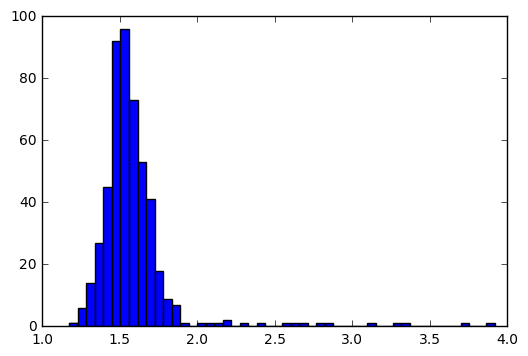

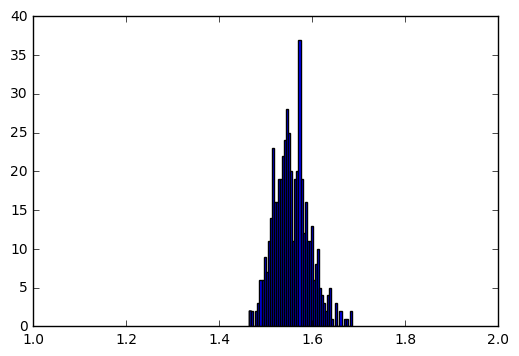

In [109]:

Nsim=500
regional_rcut_all_a = np.zeros(Nsim)

for iatom in np.arange(Nsim):
    #print(iatom)
    regional_rcut = calc_regional_rcut_group(dist_a,iatom=iatom,Nlocal=Nlocal,bandwidth=bandwidth)
    regional_rcut_all_a[iatom] = regional_rcut
    
#print(regional_rcut_all_a)
#print(rcut_local_a)
plt.hist(rcut_local_a,50)
plt.figure()

plt.hist(regional_rcut_all_a,50)
plt.xlim(1,2)

(1, 2)

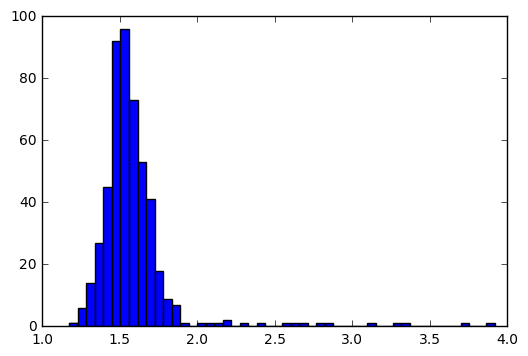

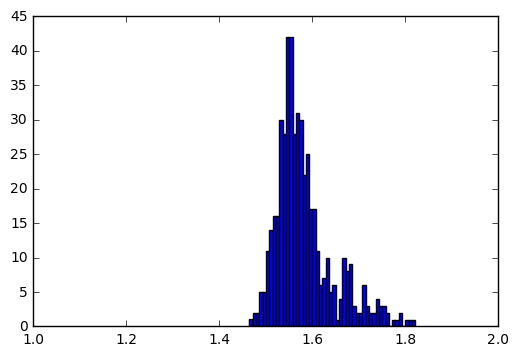

In [110]:
Nsim=500
regional_rcut_all_a = np.zeros(Nsim)

for iatom in np.arange(Nsim):
    #print(iatom)
    regional_rcut = calc_regional_rcut_avg(dist_a,iatom=iatom,Nlocal=Nlocal,bandwidth=bandwidth)
    regional_rcut_all_a[iatom] = regional_rcut
    
#print(regional_rcut_all_a)
plt.hist(rcut_local_a,50)
plt.figure()

plt.hist(regional_rcut_all_a,50)
plt.xlim(1,2)

In [116]:
pdf_approx_a,sampdist_a=approx_pdf_kde(np.ravel(local_atom),rhoat,bandwidth=0.25/20)
plt.plot(sampdist_a,pdf_approx_a,'-')

AssertionError: bandwidth is too large for the closest neighboring atom

In [63]:
rcut_a=np.zeros(20)
for ind in np.arange(20):
    pdf_approx_a,sampdist_a=approx_pdf_kde(dists_a[ind],rhoat,bandwidth=0.25)
    rcut_a[ind]=calc_rcut_local(pdf_approx_a,sampdist_a)

print(np.mean(rcut_a))
print(np.mean(dist_a[499]))

1.53392894432
4.07778593274


In [96]:
#print(np.sort(dist_a[1:20]))
#calc_rcut_local(pdf_a,np.sort(dist_a[20]))
local_atom_a=np.ravel(local_atom_sort)
print(calc_rcut_local(pdf_a,dist_a[0]))
print(calc_rcut_global(pdf_approx_a,local_atom_a))

5.44265063437
2.79069022624


In [65]:
print(sampdist_a)
print(np.sort(dist_a))

[  1.00000000e-03   5.24164069e-03   9.48328137e-03 ...,   4.23415741e+00
   4.23839905e+00   4.24264069e+00]
[[ 0.          1.01781584  1.01809875 ...,  6.61577438  6.82053775
   6.98425613]
 [ 0.          0.97089759  0.99324327 ...,  6.64999256  6.6575632
   6.93109986]
 [ 0.          0.91192439  1.10703563 ...,  6.70624412  6.75664199
   6.79247134]
 ..., 
 [ 0.          0.91486348  0.98327527 ...,  6.52764045  6.65277769
   6.6963615 ]
 [ 0.          0.91384848  0.96214522 ...,  6.54474764  6.71791983
   7.18110909]
 [ 0.          0.97560141  1.06629893 ...,  6.58105148  6.71472115
   6.80649088]]


(0.4, 0.7)

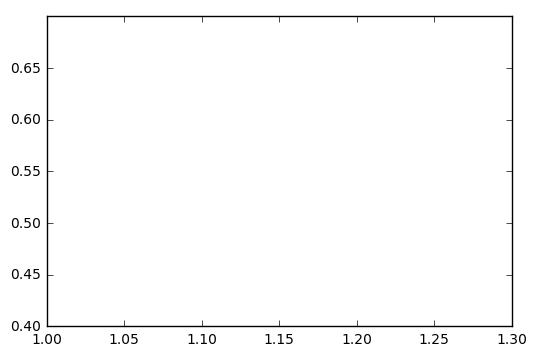

In [117]:
rcut = calc_rcut_local(pdf_a,sampdist_a)
plt.plot(sampdist_a, pdf_a, 'o')
plt.plot(rcut,pdf_a[sampdist_a==rcut], 'o')
plt.xlim(1.0,1.3)
plt.ylim(0.4, 0.7)

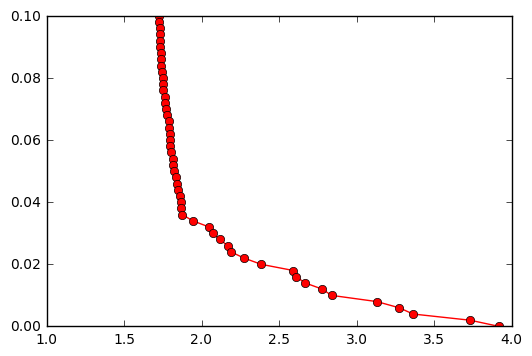

In [99]:
rcut_s_a = np.sort(rcut_local_a)
cdf_a = np.linspace(1,0,rcut_s_a.size)
plt.ylim(0,.1)
plt.plot(rcut_s_a, cdf_a, 'ro-')

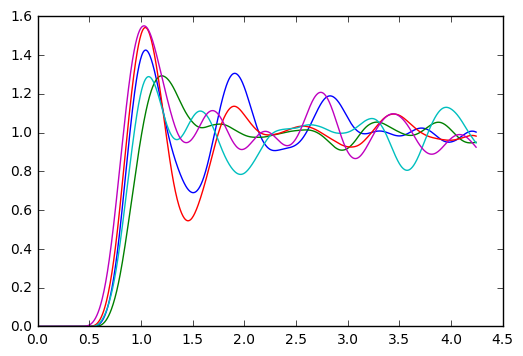

In [100]:
pdf_approx_grid_a.shape
plt.plot(sampdist_a, pdf_approx_grid_a.T[:,::100], '-');
#plt.ylim(0,4)
#plt.xlim(0.5,4.5)

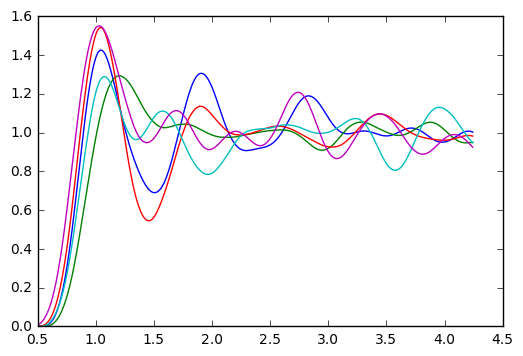

In [101]:
sampmask_a = sampdist_a >= 0.5
sampdist_hi_a=sampdist_a[sampmask_a]
pdf_hi_a = pdf_approx_grid_a[:,sampmask_a]

plt.plot(sampdist_hi_a, pdf_hi_a.T[:,::100], '-');


In [70]:
bandwidth = 0.13
pdf_approx_grid_a = []
#print(dists_a.shape)

for ind in np.arange(dists_a.shape[0]):
    ipdf_a, sampdist_a = approx_pdf_kde(dists_a[ind],rhoat,bandwidth=bandwidth)
    pdf_approx_grid_a.append(ipdf_a)
    
pdf_approx_grid_a = np.array(pdf_approx_grid_a)
    
#print(ipdf_a,sampdist_a)
#print(pdf_approx_grid_a.shape)

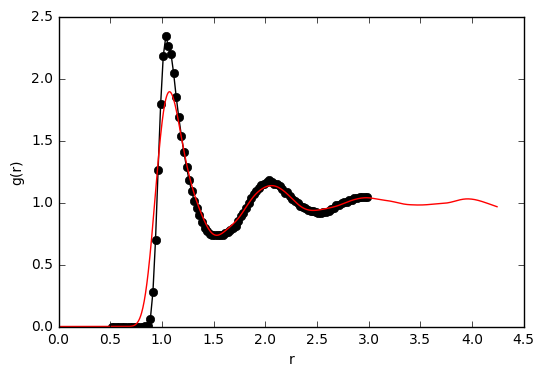

In [71]:
pdf_avg_approx_a = np.mean(pdf_approx_grid_a,axis=0)
r_a, g_avg_a = atombond.calc_avg_pdf(traj_filenm, istart=50,dist_range = [0.5,3.0],nbins=100)
plt.plot(r_a,g_avg_a,'ko-')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.plot(sampdist_a, pdf_avg_approx_a, 'r-')

(0, 3)

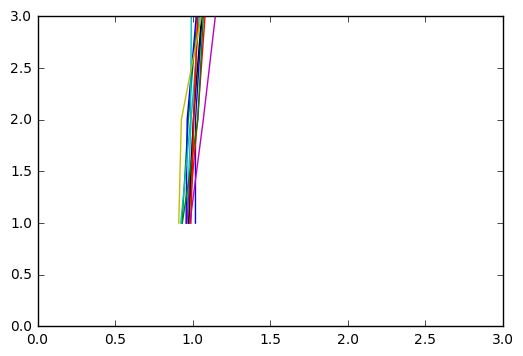

In [102]:
# np.arange(dist_a.shape[0])
for iat in np.arange(dist_a.shape[0])[::40]:
    idist_a = dist_a[iat]
    idist_a.shape
    idists_a= np.sort(idist_a)[1:]
    num_a = np.arange(1,idists_a.size+1)
    #print(idists_a)
    plt.plot(idists_a,num_a,'-')

plt.xlim(0,3)
plt.ylim(0,3)

In [73]:
len(traj)

230

In [74]:
atoms.get_number_of_atoms()

500

In [75]:
print(atombond.calc_pdf( liq_at, dist_range=[.5,3], nbins=50 ) ) 
# print(calc_coor_num(rhoat,r_a,g_dat_a,debug=False,Nsamp=1001))

(array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   9.31367338,   7.01099446,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   4.1668485 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  10.8610636 ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.27478958,   0.83498755,   0.        ,
         0.        ,   0.        ,   0.        ,   6.53535759,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.82199005,   0.        ]), array([ 0.525,  0.575,  0.625,  0.675,  0.725,  0.775,  0.825,  0.875,
        0.925,  0.975,  1.025,  1.075,  1.125,  1.175,  1.225,  1.275,
        1.325,  1.375,  1.425,  1.475,  1.525,  1.575,  1.625,  

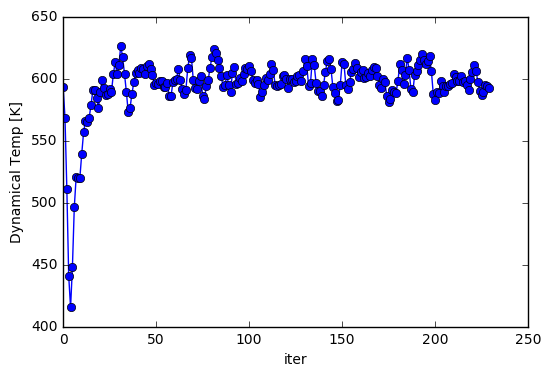

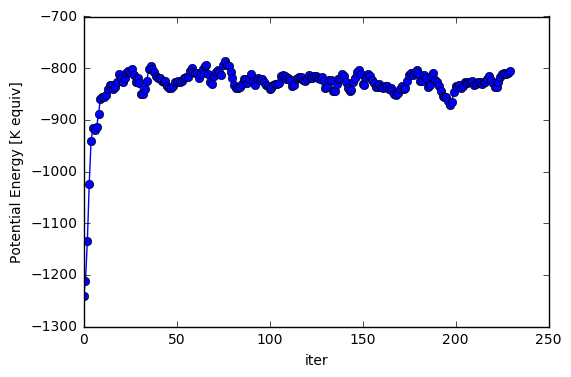

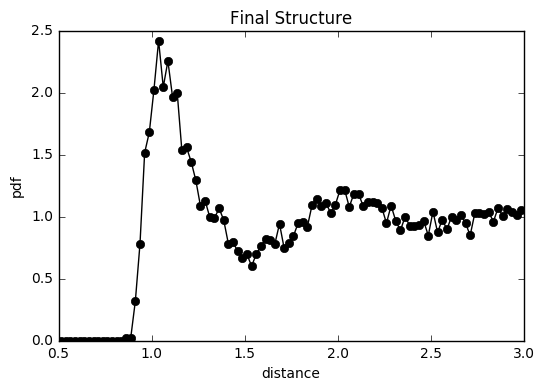

In [76]:
atombond.plot_energy_convergence(traj_filenm,istart=0)

In [77]:
Nstep = 1000
atombond.run_mdsim(liq_at,T,Nstep,Tdampfac=30,traj_filenm=traj_filenm,traj_freq=traj_freq,traj_append=True)

NameError: name 'T' is not defined

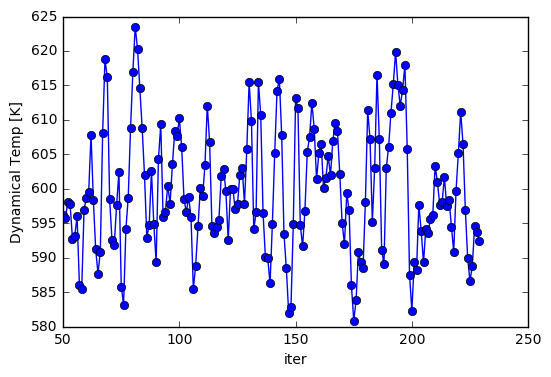

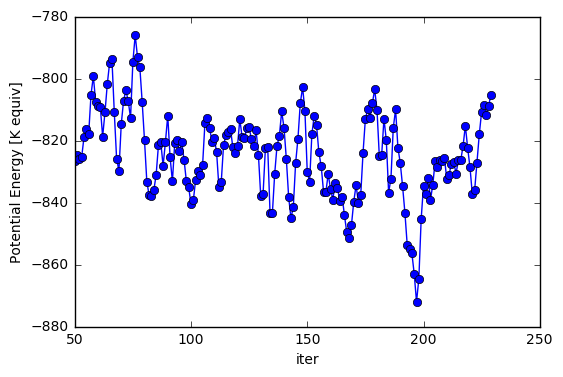

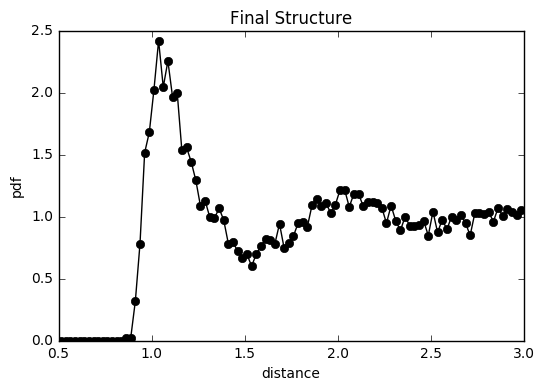

In [78]:
atombond.plot_energy_convergence(traj_filenm,istart=50)

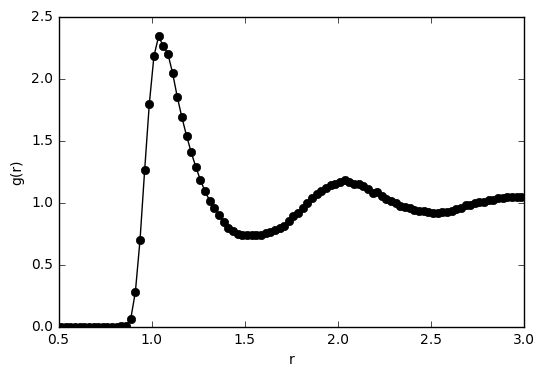

In [24]:
r_a, g_avg_a = atombond.calc_avg_pdf(traj_filenm, istart=50,dist_range = [0.5,3.0],nbins=100)
plt.plot(r_a,g_avg_a,'ko-')
plt.xlabel('r')
plt.ylabel('g(r)')


In [80]:
atombond.calc_coor_num(rhoat,r_a,g_avg_a,debug=False,Ngrid=1001)

12.357554264032423

In [81]:
atombond.calc_coor_num(rhoat,r_a,g_avg_a,rcut=1.515,debug=False,Ngrid=1001)

11.558090563523052